# Network Analysis Using Igraph

## Installation

- Install `igraph`
- Install `pycairo` for plotting

```
# pip not working
conda install pycairo
```

In [1]:
DEMO_DATA_ROOT = "../../../RepositoryData/data"

## Creating Graphs

In [2]:
#import igraph
from igraph import *
import cairo

In [3]:
g = Graph()
print(g)

IGRAPH U--- 0 0 --


```{note}
This summary consists of IGRAPH, followed by a four-character long code, the number of vertices, the number of edges, two dashes (–) and the name of the graph (i.e. the contents of the name attribute, if any)
```

In [4]:
g.add_vertices(10)
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])
print(g)

IGRAPH U--- 10 4 --
+ edges:
2--3 3--4 4--5 3--5


- Vertex IDs will always be continuous. If edges are deleted, vertices may be re-numbered.

In [5]:
g.get_eid(3,4)
g.delete_edges(1)
summary(g)

IGRAPH U--- 10 3 -- 


```{note}
Use *summary()* instead of *print()* to avoid printing the edge lists.
```

## Generating Graphs

- Deterministic graph generator
- Stochastic graph generator
    - Erdős-Rényi random networks
    - Barabási-Albert networks
    - Geometric random graphs

Create a tree with 20 vertices and each vertex has two children. The tree is deterministic.

In [6]:
# Deterministic example
g = Graph.Tree(20, 2) # 

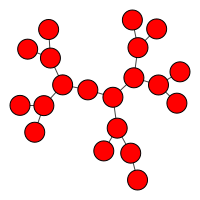

In [7]:
plot(g, bbox=(200,200))

Create geometric random graph which has *n* points chosen randomly and uniformly inside the unit square and pairs of points closer to each other than a predefined distance *d* are connected by an edge.

:::{note}
`isomorphic()` checks if two graphs are isomorphic or not.
:::

IGRAPH U--- 20 42 -- 
+ attr: x (v), y (v)


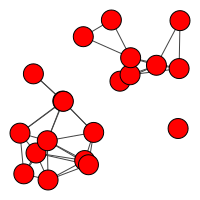

In [8]:
g = Graph.GRG(20, 0.3)
summary(g)
plot(g, bbox=(200,200))

Create an Erdos-Renyi random graph, with (n, p, m) parameters

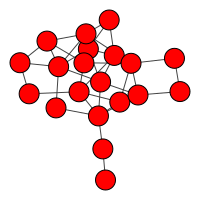

In [9]:
g = Graph.Erdos_Renyi(20, 0.2) 
plot(g, bbox=(200,200))

## Graph Attributes

- Vertices/Edges ID change when the number of vertices/edges changes in the Graph
- These ID's are always continuous or renumbered to be continuous.
- Access vertices and edges:
```
Graph.vs
Graph.es
```
- Access attributes:
```
Graph.vs["name"]
```

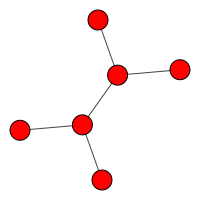

In [10]:
g = Graph.Tree(6,3)
plot(g, bbox=(200,200))

Add attributes to vertices/edges

In [11]:
g.vs["name"]=["John","Alice","Claire","Emily","Dennis","Esther"]

In [12]:
g.vs["name"]

['John', 'Alice', 'Claire', 'Emily', 'Dennis', 'Esther']

 Check attributes of specific vertices/edges

In [13]:
g.vs[3].attributes()

{'name': 'Emily'}

Add graph-level attributes

In [14]:
g["date"]="2020-10-10"
g.vs[3].attributes()
g["date"]

'2020-10-10'

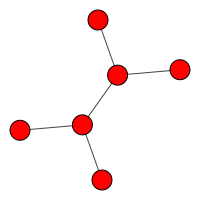

In [15]:
plot(g, bbox=(200,200))

## Loading Data

- [Graph and Digraph Glossary](http://vlado.fmf.uni-lj.si/pub/networks/data/DIC/TG/glossTG.htm)

In [16]:
g = Graph.Read_Pajek(DEMO_DATA_ROOT + "/glossTG.paj")

In [17]:
summary(g)

IGRAPH UN-- 72 118 -- 
+ attr: id (v), name (v), x (v), y (v)


## Querying vertices and edges based on attributes

Check vertice-, edge-, and graph-level attributes.

In [18]:
g.vs[0].attributes()

{'id': 'Acyclic Graph', 'name': 'Acyclic Graph', 'x': 0.6519, 'y': 0.8284}

In [19]:
g.es[0].attributes()

{}

In [20]:
g.attributes()

[]

Selecting vertices and edges

In [21]:
g.vs.select(lambda v:v["name"]=="Tree").attributes()

['id', 'name', 'x', 'y']

Predefined keyword arguments for querying:

- `name_eq`
- `name_neq`
- `name_lt`
- `name_le`
- `name_gt`
- `name_ge`
- `name_in`
- `name_notin`

All the above `name` could be any of the attributes on which the query is made.

In [22]:
g.vs.select(name_in=("Tree","Graph","Bipartite"))

The query can also be made on the **structural properties** of the vertices/edges. 

All structural properties need to be precded by an underscore (_).

- `_degree`
- `_source`/`_from`
- `_target`/`_to`
- `_within`: get vertices within the indices
- `_between`: get all edges in-between two nodes

Identify all vertices whose degrees are greater than 6.

In [23]:
r = g.vs.select(_degree_gt=6) # find nodes whose degress > 3

print([v["name"] for v in r])

['Arc', 'Digraph', 'Edge', 'Graph', 'Tree', 'Vertex', 'Walk']


Identify all edges that connect Tree and Graph

In [24]:
n1 = g.vs.select(name='Graph')
n2 = g.vs.select(name='Edge')
r = g.es.select(_between=(n1,n2))
print(len(r))
print([e for e in r])

1
[igraph.Edge(<igraph.Graph object at 0x7fb27084a048>, 42, {})]


## Finding one vertex/edge with some attributes

In [25]:
g.vs.find(name="Tree")

igraph.Vertex(<igraph.Graph object at 0x7fb27084a048>, 68, {'id': 'Tree', 'name': 'Tree', 'x': 0.5646, 'y': 0.8624})

In [26]:
g.degree("Vertex")

18

## Structural Properties of Graphs


Centrality Metrics:

- `g.degree()`
- `g.evcent()`
- `g.betweenness()`
- `g.edge_betweenness()`
- `g.pagerank()`


In [27]:
# node degrees
g.degree()[:10]
g.betweenness("Vertex") # btwness centrality for ID "Vertex"

585.4799083183758

In [28]:
## Find out edge of highest cenrality
ebs = g.edge_betweenness()
max_eb = max(ebs)
[g.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(57, 68)]

In [29]:
# same functions
g.edge_betweenness()[:10]
g.es.edge_betweenness()[:10]

[26.372757651705022,
 60.53942431837168,
 21.082828282828277,
 37.917171717171705,
 59.0,
 91.11305726437305,
 109.57099377230959,
 25.868358438946682,
 11.31190476190476,
 42.78978701037525]

In [30]:
g.vs.select(_degree_gt=2)

## Degree Distribution

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.dpi']= 150

v_degree = g.degree()
v_betweenness = g.betweenness()
v_pagerank = g.pagerank()

Correlation

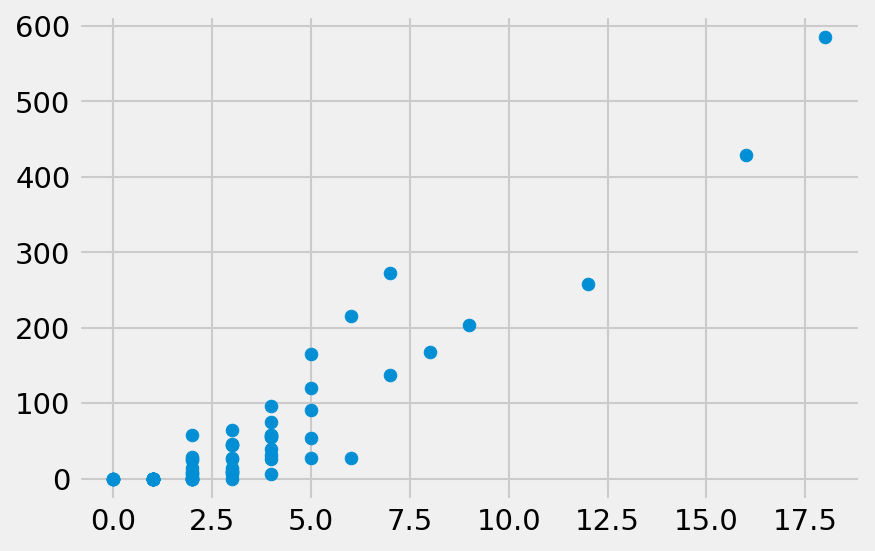

In [32]:
# correlation
plt.scatter(v_degree, v_betweenness)

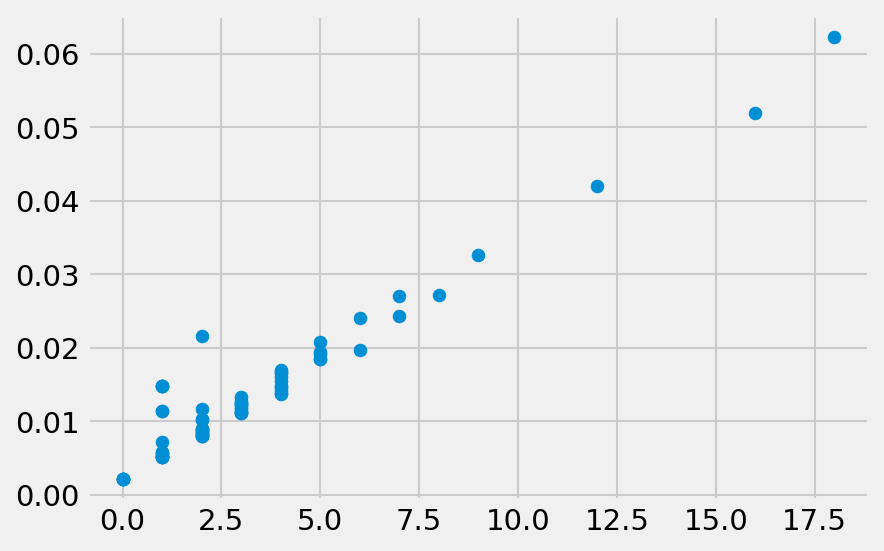

In [33]:
plt.scatter(v_degree, v_pagerank)

Degree Distribution ECDF

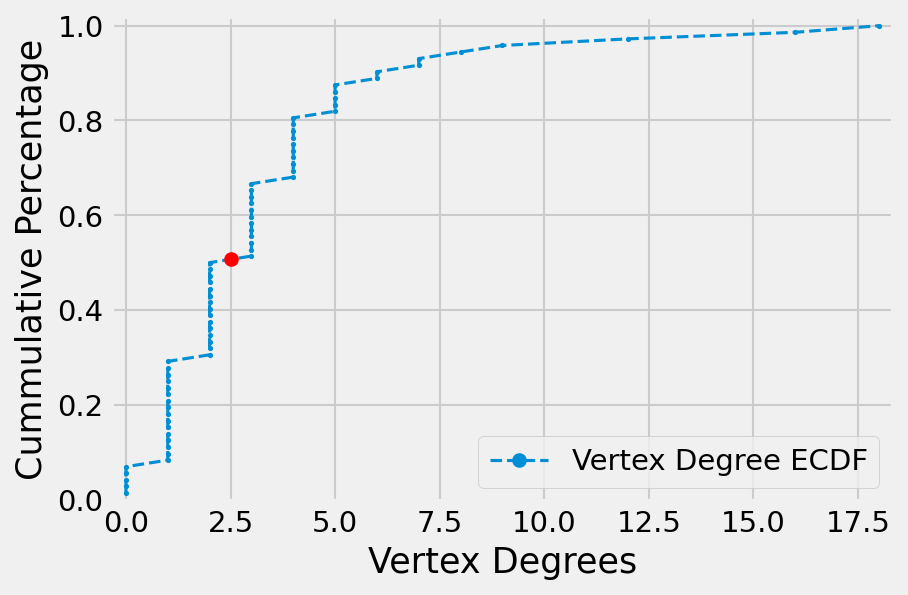

In [34]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x) # percentiles
    return(x,y)

def plot_ecdf(data, xlabel=None, ylabel='Cummulative Percentage', label=None):
    x,y = ecdf(data)
    plt.plot(x, y, marker='.', markersize=3, linestyle='--', lw=1.5,label=label)
    plt.legend(markerscale=4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)
    
    x_50 = np.percentile(x, 50)
    y_50 = np.percentile(y, 50)
    # mark 50th
    plt.plot(x_50, y_50, marker='o', color='red',
         linestyle='none')

plot_ecdf(v_degree, xlabel="Vertex Degrees", label="Vertex Degree ECDF")

## Layout

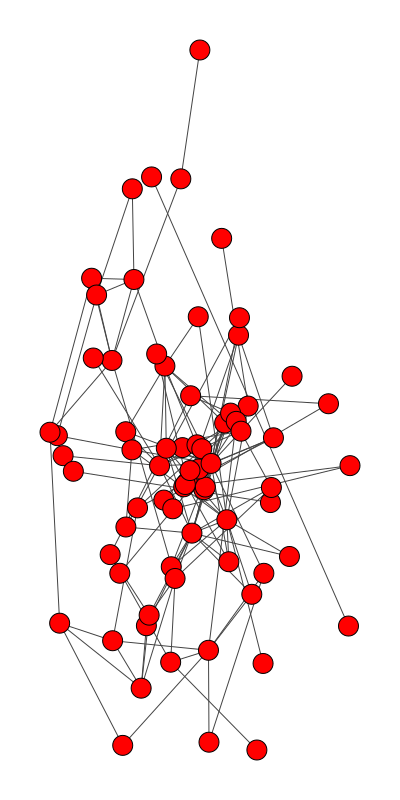

In [35]:
layout = g.layout_kamada_kawai()
plot(g, layout = layout, bbox=(400,800), margin=50)

In [36]:
v_colors = ['lightblue' if vd>6 else 'pink' for vd in v_degree]

```{note}
It is recommended to have aesthetic properties of the vertices and edges independent of their attributes.
```

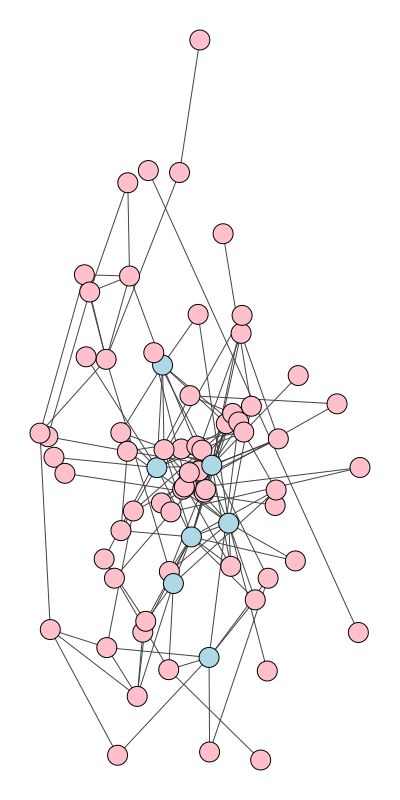

In [37]:
plot(g, layout=layout, vertex_color = v_colors,
     bbox=(400,800), margin=40)

All the visual styles can be stored in a Python dictionary object and passed to `plot()` all at once.

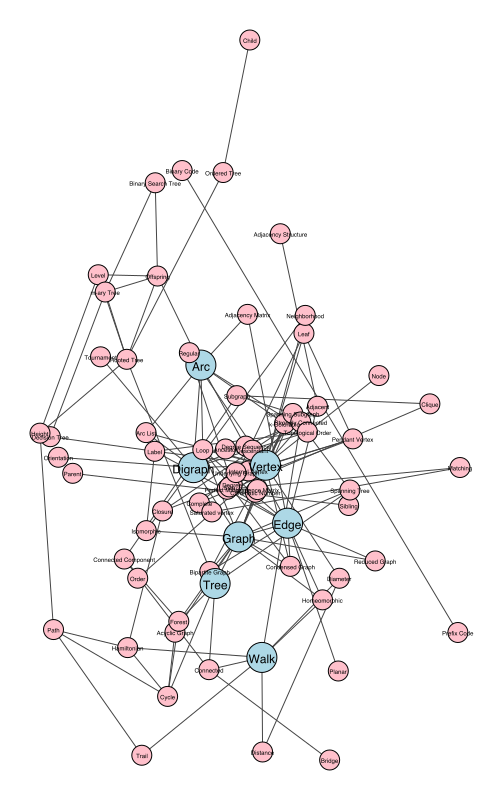

In [38]:
visual_style={}
visual_style["vertex_size"] = [30 if vd>6 else 20 for vd in v_degree]
visual_style["vertex_color"] = v_colors
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_label_size"] = [12 if vd>6 else 6 for vd in v_degree]
visual_style["vertex_shape"] = "circle"
visual_style["layout"]=layout
visual_style["bbox"]=(500,800)
visual_style["margin"]=40
plot(g, **visual_style)

## Word Network Example

In [39]:
import pickle

with open(DEMO_DATA_ROOT+'/reporting_verbs_chinese_edges_df.pickle', 'rb') as f:
    edges_df = pickle.load(f)
edges_df

,w1,w2,sim
0,認為,強調,0.768714
1,認為,因為,0.768123
2,認為,認爲,0.824715
3,認為,對於,0.757404
4,現在,因為,0.773691
...,...,...,...
9014,主張,提議,0.664787
9015,主張,見解,0.663773
9016,主張,權利,0.658277
9017,主張,言論,0.658076


In [40]:
edges_tuples = [tuple(x) for x in edges_df.values]
g2 = Graph.TupleList(edges_tuples, directed=False)
summary(g2)

IGRAPH UN-- 180 785 -- 
+ attr: name (v)


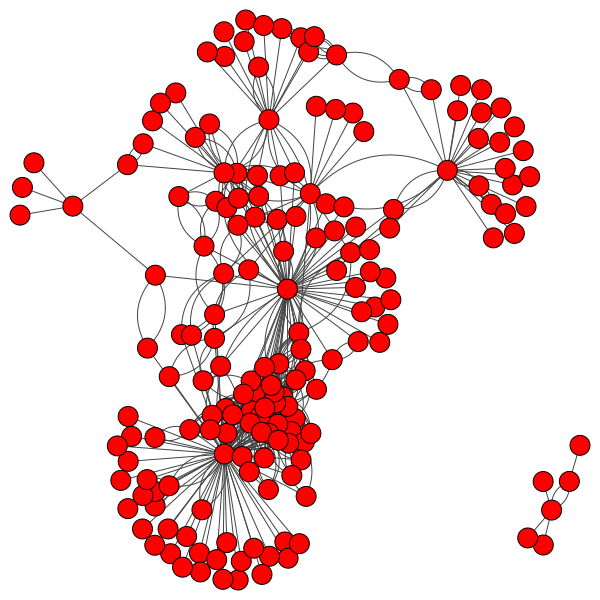

In [41]:
plot(g2)

In [42]:
g2 = g2.simplify()
g2_fg = g2.community_fastgreedy()

In [43]:
g2_fg.optimal_count
nodes_membership = g2_fg.as_clustering(n=8).membership
print(nodes_membership)

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 6, 6, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 7, 7, 2, 2, 2, 2, 2, 5, 2, 2, 1, 4, 4, 0, 2, 2, 1, 0, 5, 0, 0, 0, 2, 2, 0, 5, 5, 4, 7, 7, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, 7, 0, 0, 0, 0, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 4, 4, 4, 4, 4, 4]


In [44]:
import matplotlib.pyplot as plt
# # from seaborn import color_palette
# palette = plt.get_cmap("Set3")
# palette(11)[1]
plt.rcParams['font.sans-serif']=["PingFang HK"]
plt.rcParams['axes.unicode_minus']= False
import seaborn as sns

palette = sns.color_palette('tab10')

In [45]:
from xpinyin import Pinyin
p = Pinyin()
p.get_pinyin(g2.vs['name'][1], tone_marks='numbers')


'qiang2-diao4'

In [46]:
# WIDTH = 3
# HEIGHT = 2
# PIXEL_SCALE = 200

# surface = cairo.ImageSurface(cairo.FORMAT_RGB24,
#                              WIDTH*PIXEL_SCALE,
#                              HEIGHT*PIXEL_SCALE)
# ctx = cairo.Context(surface)
# ctx.scale(PIXEL_SCALE, PIXEL_SCALE)

# ctx.rectangle(0, 0, WIDTH, HEIGHT)
# ctx.set_source_rgb(0.8, 0.8, 1)
# ctx.fill()

# # Drawing code
# ctx.set_source_rgb(1, 0, 0)
# ctx.set_font_size(0.25)
# ctx.select_font_face("Arial Unicode MS",
#                      cairo.FONT_SLANT_NORMAL,
#                      cairo.FONT_WEIGHT_NORMAL)
# ctx.move_to(0.5, 0.5)
# ctx.show_text("我是中文")
# # End of drawing code

# surface.write_to_png('text.png') 

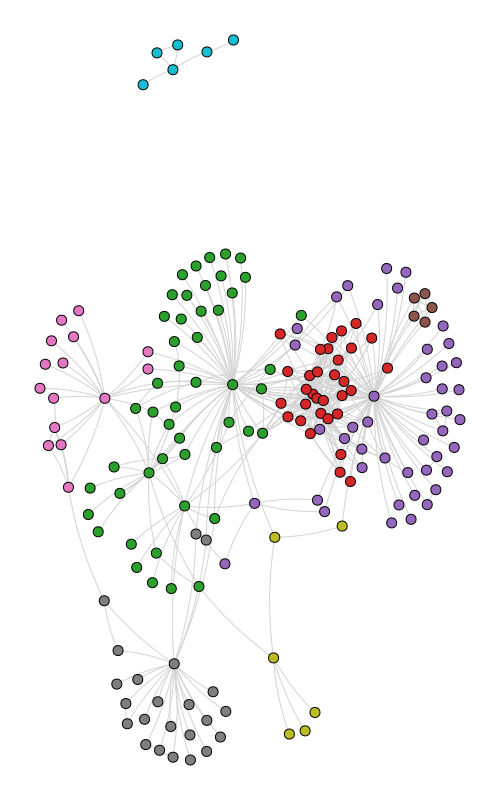

In [47]:
# WIDTH = 10
# HEIGHT = 8
# PIXEL_SCALE = 200

# surface = cairo.ImageSurface(cairo.FORMAT_RGB24,
#                              WIDTH*PIXEL_SCALE,
#                              HEIGHT*PIXEL_SCALE)
# ctx = cairo.Context(surface)
# ctx.scale(PIXEL_SCALE, PIXEL_SCALE)

# ctx.rectangle(0, 0, WIDTH, HEIGHT)
#ctx.set_source_rgb(0.8, 0.8, 1)
#ctx.fill()

# Drawing code
# ctx.set_source_rgb(1, 0, 0)
# ctx.set_font_size(0.25)
# ctx.select_font_face("sans",
#                      cairo.FONT_SLANT_NORMAL,
#                      cairo.FONT_WEIGHT_NORMAL)

layout = g2.layout_fruchterman_reingold()

visual_style={}
visual_style["vertex_size"] = 10
visual_style["vertex_color"] = [palette[m+2] for m in nodes_membership]

#visual_style["vertex_label"] = [p.get_pinyin(n, "",tone_marks='numbers') for n in g2.vs['name']]
visual_style["vertex_label"] = g2.vs['name']
visual_style["labels"] = g2.vs['name']
visual_style["vertex_label_dist"] =1
visual_style["vertex_label_size"]= 8
#visual_style["vertex_label_size"] = [12 if vd>6 else 6 for vd in v_degree]
#visual_style["vertex_shape"] = "circle"

visual_style["edge_color"] = "lightgrey"
visual_style["edge_width"] = 1
visual_style["edge_curved"] = 0.1

visual_style["layout"]=layout
visual_style["bbox"]=(500,800)
visual_style["margin"]=40

plot(g2, target="text.png", **visual_style)

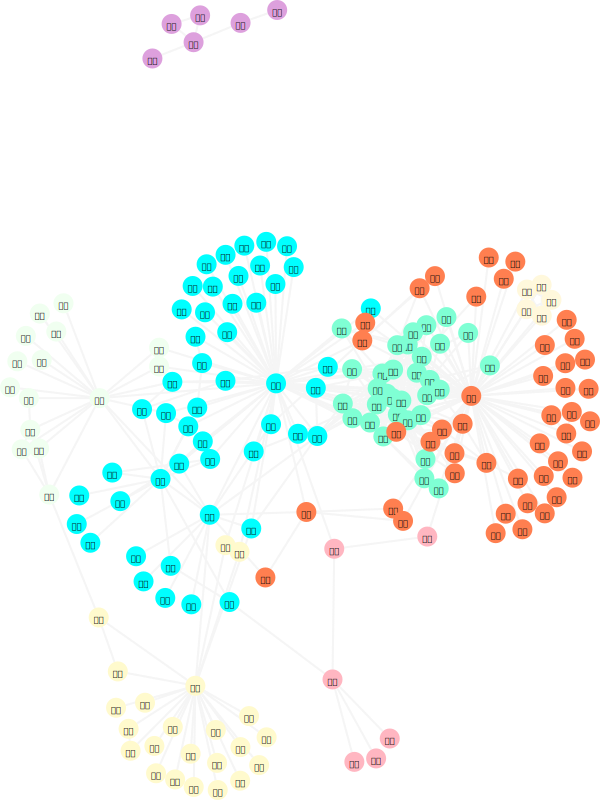

In [48]:
svg_colors=['aqua','aquamarine','coral','cornsilk',
           'honeydew','lemonchiffon','lightpink','plum']
visual_style["colors"] = [svg_colors[m] for m in nodes_membership]


g2.write_svg("text.svg", 
             labels=visual_style["vertex_label"],
             layout=layout,
             width=600,
             height=800,
             colors=visual_style["colors"],
             vertex_size=visual_style["vertex_size"],
             edge_colors= ['whitesmoke' for i in range(len(g2.es))],
             #edge_stroke_widths=visual_style["edge_width"],
             font_size= 8
            )
# # g2_plot.save('text2.png')
# # surface.write_to_png('text.png')

from IPython.display import SVG, display
display(SVG('text.svg'))

- Chinese characters are not showing up in igraph due to the issues of `cairo` Chinese support.
- A workaround is to save the graph in `SVG`
- Then open the SVG with text editor
- Then find all `font-family:...` setting and replace the font name with system-compatible Chinese font names.

## Referneces

- [igraph tutorials](https://igraph.org/python/doc/tutorial/tutorial.html)
- [igraph API documentation](https://igraph.org/python/doc/igraph-module.html)
- [SNAP datasets](http://snap.stanford.edu/data/links.html)
- [SVG Colors](https://www.december.com/html/spec/colorsvgsvg.html)